# Exercises

> * Using the repo setup directions, setup a new local and remote repository named anomaly-detection-exercises. The local version of your repo should live inside of ~/codeup-data-science. This repo should be named anomaly-detection-exercises
> * Save this work in your anomaly-detection-exercises repo. Then add, commit, and push your changes.
> * Save the work in either continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb



In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import lemonade.csv
df = pd.read_csv('lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.tail()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [6]:
df.nunique()

Date           365
Day              7
Temperature    176
Rainfall        35
Flyers          63
Price            1
Sales           39
dtype: int64

## Takeaways
* Seven columns, possible to make that `Date` column into datetime and then change it over to index 
* data appears to cover entire year

In [8]:
df['Date'] = pd.to_datetime(df.Date)

In [10]:
df = df.set_index('Date')

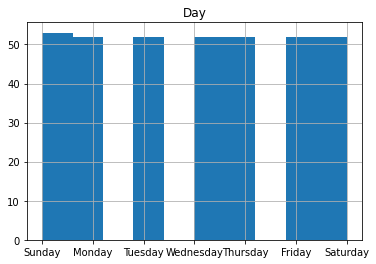

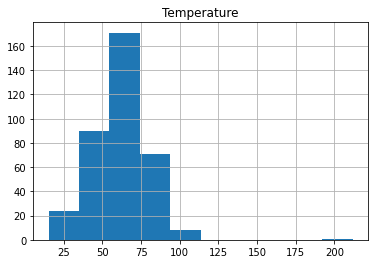

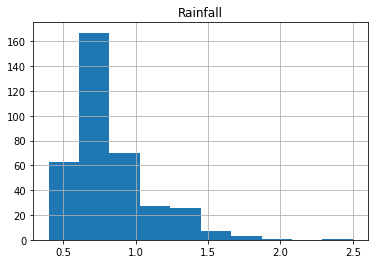

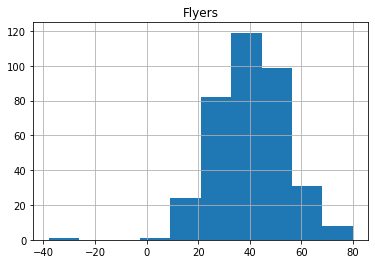

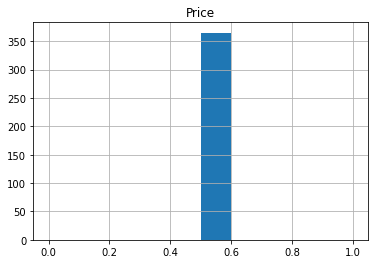

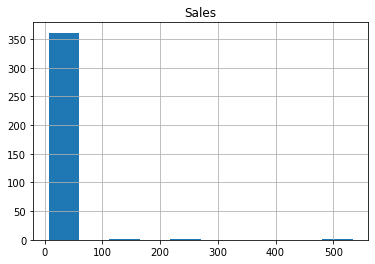

In [11]:
## Visualizations of Data
## figure out home to make them pop out in a facet grid or row
for col in df.columns:
    df[col].hist()
    plt.title(col)
    plt.show()

## Takeaways
* Days like uniform distribution
* Temperatature, Rainfall,  with some outliers, skewed right
* Flyers skewed left
* Look closer at price
* sales with outliers in 3 clumps

In [14]:
# for ready made grouping and analysis
df['month'] = df.index.month_name()

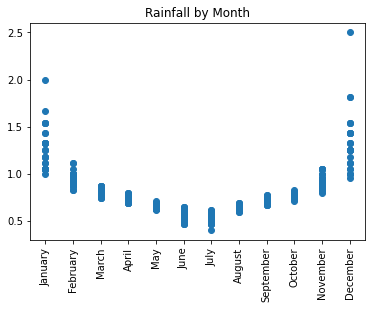

In [18]:
plt.scatter(df.month, df.Rainfall)
plt.xticks(rotation=90)
plt.title('Rainfall by Month')
plt.show()

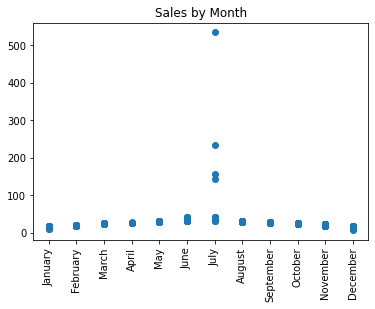

In [17]:
plt.scatter(df.month, df.Sales)
plt.xticks(rotation=90)
plt.title('Sales by Month')
plt.show()

## Takeaways
* Outliers for `rainfall` happening in december and january. 
* All outliers for sales take place in July

# 1. Define a function named get_lower_and_upper_bounds that has two arguments. 
* The first argument is a pandas Series. 
* The second argument is the multiplier, which should have a default argument of 1.5.

In [19]:
def get_lower_and_upper_bounds(col, multiplier=1.5):
    """
    Purpose: apply the Tukey method to create fences for outliers
    ---
    Parameters:
        col: a pandas Series
        multiplier: default = 1.5, float, magnitude specified for the IQR rule
    ---
    Returns:
    lower_bound: float representing requested lower fence value
    upper_bound: float  representing requested upper fence value
    """

    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_buond = q3 + multiplier * iqr

    return lower_bound, upper_buond

In [20]:
#test out function
get_lower_and_upper_bounds(df.Rainfall, multiplier=3)

(-0.13, 1.69)

# 1. Using lemonade.csv dataset and focusing on continuous variables:

In [22]:
continuous_col = ["Temperature", 'Rainfall', 'Flyers', 'Price', 'Sales']

* Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

* Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

* can create dictionary that will hold the outliers for each column in a dataframe, as well as upper nd lower bounds for reference

In [30]:
outliers = {}
for col in continuous_col:
    lower_bound,  upper_bound = get_lower_and_upper_bounds(df[col])
    print(f'{col}\n\
        Lower Bound: {lower_bound}\
        Upper Bound: {upper_bound}')
    outliers[col] = {}
    outliers[col]['bounds'] = {'lower': lower_bound, 'upper': upper_bound}
    outliers[col]['df'] = df[(df[col] > upper_bound) | ( df[col] < lower_bound)]

Temperature
        Lower Bound: 16.700000000000003        Upper Bound: 104.7
Rainfall
        Lower Bound: 0.26        Upper Bound: 1.3
Flyers
        Lower Bound: 4.0        Upper Bound: 76.0
Price
        Lower Bound: 0.5        Upper Bound: 0.5
Sales
        Lower Bound: 5.0        Upper Bound: 45.0


In [31]:
[print('\n----------------\n', key, '\n', outliers[key]['df'].to_markdown()) for key in outliers.keys()]


----------------
 Temperature 
 | Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 | February |
| 2017-12-31 00:00:00 | Sunday   |          15.1 |       2.5  |        9 |     0.5 |       7 | December |

----------------
 Rainfall 
 | Date                | Day       |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:----------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday    |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-01-02 00:00:00 | Monday    |          28.9 |       1.33 |       15 |     0.5 |      13 | January  |
| 2017-01-03 00:00:00 | Tuesday   |          34.5 |       1.33 |       27 |     0.5 |

[None, None, None, None, None]

* Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?


* Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


In [33]:
outliers_3 = {}
for col in continuous_col:
    lower_bound,  upper_bound = get_lower_and_upper_bounds(df[col], 3)
    print(f'{col}\n\
        Lower Bound: {lower_bound}\
        Upper Bound: {upper_bound}')
    outliers_3[col] = {}
    outliers_3[col]['bounds'] = {'lower': lower_bound, 'upper': upper_bound}
    outliers_3[col]['df'] = df[(df[col] > upper_bound) | ( df[col] < lower_bound)]

Temperature
        Lower Bound: -16.299999999999997        Upper Bound: 137.7
Rainfall
        Lower Bound: -0.13        Upper Bound: 1.69
Flyers
        Lower Bound: -23.0        Upper Bound: 103.0
Price
        Lower Bound: 0.5        Upper Bound: 0.5
Sales
        Lower Bound: -10.0        Upper Bound: 60.0


In [34]:
[print('\n----------------\n', key, '\n', outliers_3[key]['df'].to_markdown()) for key in outliers_3.keys()]


----------------
 Temperature 
 | Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 | February |

----------------
 Rainfall 
 | Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday  |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-12-05 00:00:00 | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 | December |
| 2017-12-10 00:00:00 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 | December |
| 2017-12-31 00:00:00 | Sunday  |          15.1 |       2.5  |        9 |     0.5 |       7 | 

[None, None, None, None, None]

# 2. Identify if any columns in lemonade.csv are normally distributed. 

In [37]:
#use Shapiro Wilk test for normality
from scipy.stats import norm, shapiro

In [47]:
#be sure to skip categorical columns
for col in continuous_col:
    w, p = shapiro(df[col])
    print(col)
    print(f'W statistic: {w}')
    print(f'p statistic: {round(p, 4)}')
    if p >.05: print(f'{col} is normally distributed.')
    print('---')

Temperature
W statistic: 0.9153038263320923
p statistic: 0.0
---
Rainfall
W statistic: 0.8509272933006287
p statistic: 0.0
---
Flyers
W statistic: 0.9747113585472107
p statistic: 0.0
---
Price
W statistic: 1.0
p statistic: 1.0
Price is normally distributed.
---
Sales
W statistic: 0.20651870965957642
p statistic: 0.0
---


/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [48]:
df.Price.value_counts()

0.5    365
Name: Price, dtype: int64

For normally distributed columns:
* Use a 2 sigma decision rule to isolate the outliers.
> * Do these make sense?
> * Should certain outliers be kept or removed?


# 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv